In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline

## Baseline Dataset

In [2]:
lag = 512

base = pd.read_pickle('./pkl_datasets/baseline_dataset_ACF_' + str(lag) + '.gzip')
base.head()

,ID,ACF_512,H,JSD,C,n_components,ACI,Hs,Ha,AEI
0,journal.pone.0004065.s018.flac,"[1.0, 0.3159691464939133, -0.19313433219221515...",0.846339,0.354606,0.300117,316,535.872117,0.844463,0.980452,0.827956
1,journal.pone.0004065.s017.flac,"[1.0, 0.9136246623305964, 0.7106019969300389, ...",0.716821,0.566582,0.406138,409,525.876161,0.713769,0.979878,0.699407
2,journal.pone.0004065.s015.flac,"[1.0, 0.06996709008426101, -0.9398546299007356...",0.704638,0.605776,0.426853,425,479.178002,0.704269,0.989265,0.696709
3,journal.pone.0004065.s013.flac,"[1.0, 0.857544569268467, 0.7808859927537377, 0...",0.618595,0.626243,0.387391,400,697.112265,0.613975,0.977368,0.600079
4,journal.pone.0004065.s014.flac,"[1.0, 0.0844259528093256, -0.9226459123449822,...",0.709295,0.593561,0.421010,424,469.874821,0.706308,0.989290,0.698744


In [3]:
labels = []
for index, row in base.iterrows():
    labels.append('$s_{'+(row['ID'].split('.'))[-2].split('0')[-1]+'}$')

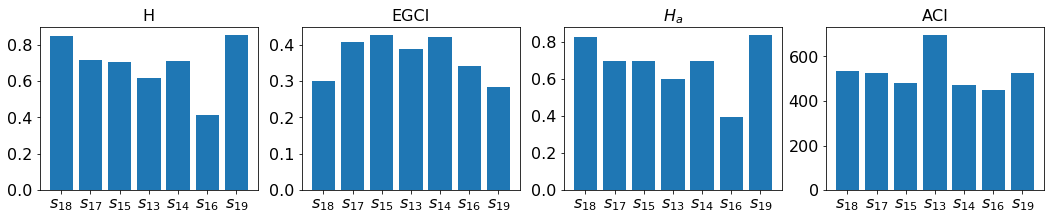

In [4]:
plt.figure(figsize=(18,3))
plt.rc('font', size=16)
plt.rc('axes', titlesize=16)

plt.subplot(1,4,1)
plt.bar(range(0,base.shape[0]),base['H'])
plt.xticks(range(0,base.shape[0]),labels)
plt.title('H')

plt.subplot(1,4,2)
plt.bar(range(0,base.shape[0]),base['C'])
plt.xticks(range(0,base.shape[0]),labels)
plt.title('EGCI')

plt.subplot(1,4,3)
plt.bar(range(base.shape[0]),base['AEI'])
plt.xticks(range(0,base.shape[0]),labels)
plt.title(r'$H_a$')

plt.subplot(1,4,4)
plt.bar(range(base.shape[0]),base['ACI'])
plt.xticks(range(0,base.shape[0]),labels)
plt.title('ACI')

# plt.savefig('./figures/Fig3.eps', format="eps", bbox_inches='tight')

plt.show()